In [17]:
# import necessary libraries
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier


In [18]:
# Create and configure logger
logging.basicConfig(filename='logfile.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


In [19]:
pd.set_option('display.max_columns', None)

In [22]:
df = pd.read_csv(r'C:\Users\LP-182\Downloads\Backorder-Prediction-main\Kaggle_Test_Dataset_v2.csv', low_memory=False)


## EDA

In [23]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242076 entries, 0 to 242075
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                242076 non-null  object 
 1   national_inv       242075 non-null  float64
 2   lead_time          227351 non-null  float64
 3   in_transit_qty     242075 non-null  float64
 4   forecast_3_month   242075 non-null  float64
 5   forecast_6_month   242075 non-null  float64
 6   forecast_9_month   242075 non-null  float64
 7   sales_1_month      242075 non-null  float64
 8   sales_3_month      242075 non-null  float64
 9   sales_6_month      242075 non-null  float64
 10  sales_9_month      242075 non-null  float64
 11  min_bank           242075 non-null  float64
 12  potential_issue    242075 non-null  object 
 13  pieces_past_due    242075 non-null  float64
 14  perf_6_month_avg   242075 non-null  float64
 15  perf_12_month_avg  242075 non-null  float64
 16  lo

In [25]:
logging.info('Preprocessing data...')

In [26]:
# Check null values
df.isnull().sum()

sku                      0
national_inv             1
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
went_on_backorder        1
dtype: int64

In [27]:
# From above we can say that 'lead_time' feature contains more Null values hence lets fill it out
print(df['lead_time'].median())
print(df['lead_time'].mean())

8.0
7.923017712699746


In [28]:
df['lead_time'] = df['lead_time'].fillna(df['lead_time'].median())

In [30]:
# Drop other Null values
df.dropna(inplace=True)


In [31]:
# We removed all the null values
df.isnull().sum().sum()

0

In [32]:
# List out all the catogorical features
categorical_columns = []
columns = df.columns
for name in columns:
    print(name)
    if df[name].dtype==object:
        categorical_columns.append(name)
    

sku
national_inv
lead_time
in_transit_qty
forecast_3_month
forecast_6_month
forecast_9_month
sales_1_month
sales_3_month
sales_6_month
sales_9_month
min_bank
potential_issue
pieces_past_due
perf_6_month_avg
perf_12_month_avg
local_bo_qty
deck_risk
oe_constraint
ppap_risk
stop_auto_buy
rev_stop
went_on_backorder


In [33]:
categorical_columns

['sku',
 'potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [34]:
logging.info('Data analysis...')
def values_counts( list):
    for i in list:
        logging.info(df[i].value_counts())
    

In [35]:
# Lets count all the values in categorical features
values_counts(categorical_columns)

In [36]:
for i in categorical_columns:
    df[i].replace(['No','Yes'],[0,1],inplace=True)

In [37]:
# sku feature is like index feature hence it will be better to drop it
df.drop('sku',inplace=True, axis=1)

In [38]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,62.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
1,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,-99.00,-99.00,0.0,0,0,1,0,0,0
2,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.54,0.71,0.0,0,0,0,1,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242075 entries, 0 to 242074
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   national_inv       242075 non-null  float64
 1   lead_time          242075 non-null  float64
 2   in_transit_qty     242075 non-null  float64
 3   forecast_3_month   242075 non-null  float64
 4   forecast_6_month   242075 non-null  float64
 5   forecast_9_month   242075 non-null  float64
 6   sales_1_month      242075 non-null  float64
 7   sales_3_month      242075 non-null  float64
 8   sales_6_month      242075 non-null  float64
 9   sales_9_month      242075 non-null  float64
 10  min_bank           242075 non-null  float64
 11  potential_issue    242075 non-null  int64  
 12  pieces_past_due    242075 non-null  float64
 13  perf_6_month_avg   242075 non-null  float64
 14  perf_12_month_avg  242075 non-null  float64
 15  local_bo_qty       242075 non-null  float64
 16  deck_ri

## Feature Selection

In [40]:
# Feature selection
corr_matrix = df.corr()
corr_with_y = corr_matrix["went_on_backorder"].drop("went_on_backorder")  # drop "Y" from the correlation matrix since it will be 1.0
logging.info(corr_with_y)
relevant_features = corr_with_y[corr_with_y>0.004]
relevant_features_1 = corr_with_y[corr_with_y<-0.004]

logging.info(relevant_features)
logging.info(relevant_features_1)

In [41]:
# These are the releted features to the output
features = ['national_inv', 'lead_time', 'sales_1_month', 'pieces_past_due', 'perf_6_month_avg','in_transit_qty',
            'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']


In [42]:
x = df[features]

In [43]:
x.shape

(242075, 12)

In [44]:
y=df['went_on_backorder']

In [45]:
y.shape

(242075,)

## Data visualization

<Axes: >

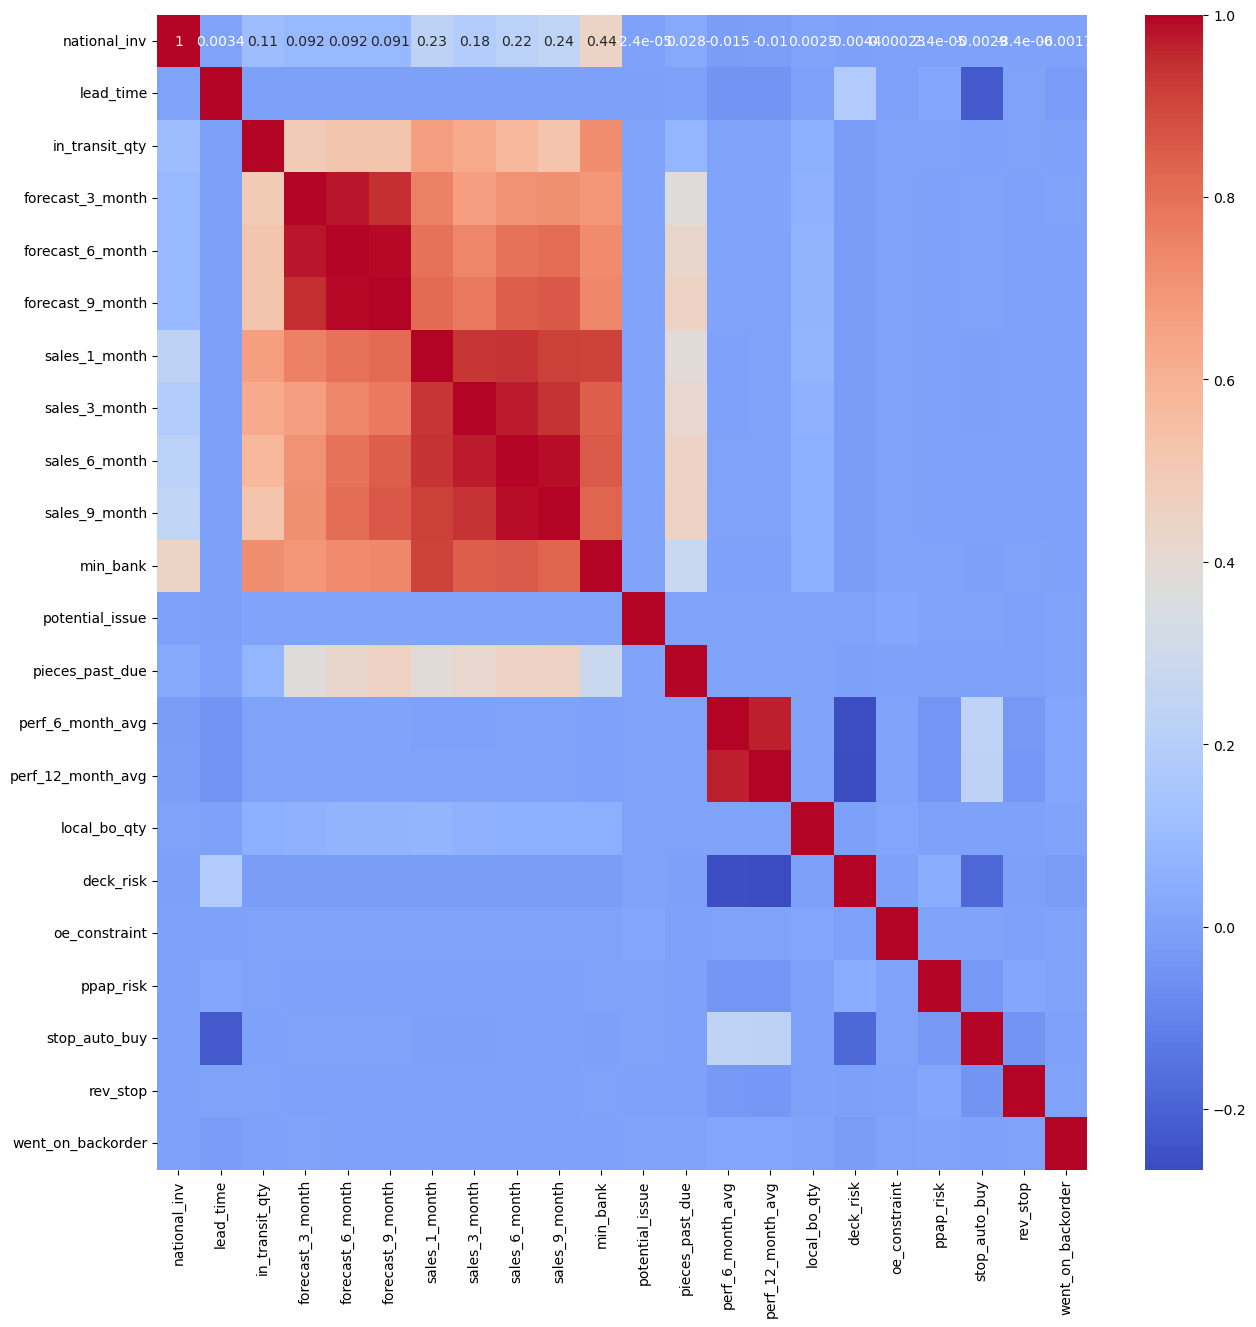

In [46]:
# Data visualization
logging.info('Data visualization...')
plt.figure(figsize=(15,15))
import seaborn as sns
corr = df.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')


## Resampling

In [47]:
# Resampling
logging.info('Resampling data...')
oversampler = RandomOverSampler()
x_resampled, y_resampled = oversampler.fit_resample(x, y)
print(y_resampled.value_counts())

went_on_backorder
0    239387
1    239387
Name: count, dtype: int64


In [48]:
x_resampled.shape

(478774, 12)

In [49]:
# Split into train and test sets
logging.info('Splitting data into train and test sets...')
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, random_state=0, test_size=0.2)

In [50]:
y_train.value_counts()

went_on_backorder
1    191566
0    191453
Name: count, dtype: int64

<Figure size 2000x2000 with 0 Axes>

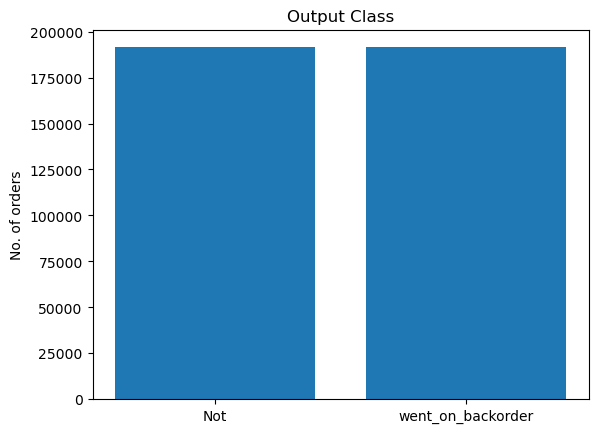

In [51]:
classes=['Not','went_on_backorder']
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.bar(classes,y_train.value_counts())
plt.title("Output Class")
plt.ylabel("No. of orders")
plt.show()

## Model Building

In [52]:
model_1 = DecisionTreeClassifier()
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)   
acc_score = accuracy_score(y_test, y_pred_1)
conf_matrix = confusion_matrix(y_test, y_pred_1)

In [54]:
print("Accuracy score for Decision Tree",acc_score)

Accuracy score for Decision Tree 0.9612657302490731


In [53]:
model_2 = RandomForestClassifier(n_estimators=40)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)
acc_score_2 = accuracy_score(y_test, y_pred_2)
conf_matrix = confusion_matrix(y_test, y_pred_2)
print("Accuracy Score for Random Forest",acc_score_2)

Accuracy Score for Random Forest 0.9631350843298


In [55]:
model_3 = GradientBoostingClassifier(n_estimators=100)
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)
acc_score_3 = accuracy_score(y_test, y_pred_3)
conf_matrix = confusion_matrix(y_test, y_pred_3)
print("Accuracy Score for Gradient Boosting",acc_score_3)



Accuracy Score for Gradient Boosting 0.8577202234870241


In [56]:
import joblib
joblib.dump(model_1,'backorder_model_1')

['backorder_model_1']